<a href="https://colab.research.google.com/github/LuigiFalcade13/Mineiracao_de_Dados/blob/main/AtividadeLuigiFalcade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Luigi Falcade de Souza**

base de dados utilizada: https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs (Músicas mais tocadas no Spotify)

A análise será feita abaixo e as perguntas estarão respondidas no final da análise

**Importando a biblioteca Pandas e criando uma variável para receber o dataset**

In [35]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('/content/Spotify Most Streamed Songs.csv')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


**Mostrando os nomes das colunas**

In [36]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')

Neste trecho de código está sendo utilizando o método df.columns, que retorna uma lista com os nomes das colunas do DataFrame df.

**Mostrando informações importantes, como: numero de registros e também valores nulos que poderão ser descartados afim de minimizar erros futuros**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

O df.info() fornece: Número de Entradas: Mostra quantas linhas (ou entradas) estão presentes no DataFrame. Número de Colunas: Indica quantas colunas existem. Nomes das Colunas: Lista os nomes de todas as colunas. Tipos de Dados: Mostra os tipos de dados de cada coluna (por exemplo, int, float, object). Valores Não Nulos: Informa quantos valores não nulos existem em cada coluna, ajudando a identificar colunas com dados ausentes.

**Mostrando de uma maneira mais clara**

In [38]:
df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [39]:
# Substituir valores nulos pela média em várias colunas numéricas
colunas_numericas = [
    'artist_count',
    'released_year',
    'released_month',
    'released_day',
    'in_spotify_playlists',
    'in_spotify_charts',
    'in_apple_playlists',
    'in_apple_charts',
    'in_deezer_charts',
    'bpm',
    'danceability_%',
    'valence_%',
    'energy_%',
    'acousticness_%',
    'instrumentalness_%',
    'liveness_%',
    'speechiness_%'
]

for coluna in colunas_numericas:
    df[coluna].fillna(df[coluna].mean(), inplace=True)



<ipython-input-39-d1cbccdf8703>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coluna].fillna(df[coluna].mean(), inplace=True)


Lista de Colunas: Criei uma lista chamada colunas_numericas que contém os nomes das colunas numéricas no DataFrame.

Usei um loop for para percorrer cada coluna da lista.

Para cada coluna, apliquei fillna() para substituir os valores nulos pela média dos valores dessa coluna.


In [40]:
# Converter a coluna 'key' para o tipo categórico
df['key'] = df['key'].astype('category')

# Converter a coluna 'streams' para numérico, forçando erros a NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')


Essas operações são etapas de pré-processamento que ajudam a garantir que os dados estejam em formatos apropriados para análise. A conversão de tipos de dados é uma prática comum para facilitar operações matemáticas e estatísticas e para otimizar o desempenho das análises.

**Com o comando describe() irei fazer uma pré análise estatística dos valores numéricos**

In [41]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


Algumas características importantes a serem ressaltadas de acordo com a análise:

-Todas as colunas têm 953 entradas, indicando que não há valores nulos nas colunas analisadas.

-artist_count: Em média, as músicas têm 1,56 artistas, com um máximo de 8 artistas.

-released_year: A maioria das músicas foi lançada em torno de 2018, com o ano mais antigo sendo 1930.

-streams: A média de streams é de aproximadamente 514 milhões, com um máximo de cerca de 3,7 bilhões, indicando que algumas músicas têm popularidade extremamente alta.

-released_month e released_day: Os meses e dias de lançamento variam, com a média em junho (mês 6) e por volta do dia 14. Isso sugere uma distribuição normal em relação a lançamentos ao longo do ano.

-in_spotify_playlists: As músicas aparecem, em média, em 5200 playlists do Spotify, com algumas alcançando até 52.898 playlists.

-bpm (batidas por minuto): A média é de 122, sugerindo uma predominância de músicas em um ritmo moderado.

In [42]:
df['key'].value_counts

<bound method IndexOpsMixin.value_counts of 0       B
1      C#
2       F
3       A
4       A
       ..
948     A
949    F#
950    C#
951    C#
952     E
Name: key, Length: 953, dtype: category
Categories (11, object): ['A', 'A#', 'B', 'C#', ..., 'F', 'F#', 'G', 'G#']>

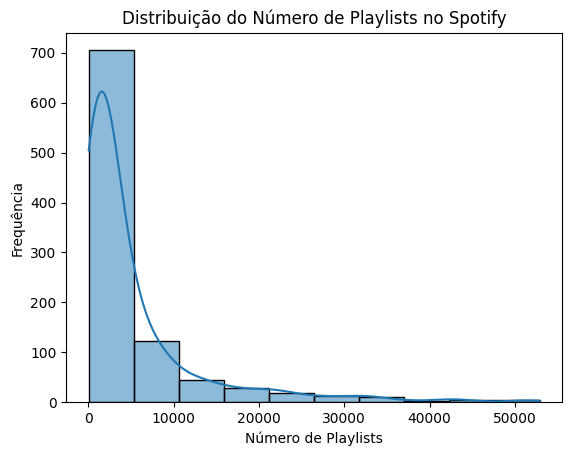

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['in_spotify_playlists'], bins=10, kde=True)
plt.title('Distribuição do Número de Playlists no Spotify')
plt.xlabel('Número de Playlists')
plt.ylabel('Frequência')
plt.show()

Com esta análise, meu objetivo é entender como as músicas estão distribuídas em relação ao número de playlists em que aparecem. Através do histograma, consigo visualizar a frequência com que diferentes quantidades de playlists incluem as músicas.

Eixo X (Número de Playlists): Representa o número de playlists em que uma música específica está presente.

Eixo Y (Frequência): Mostra quantas músicas estão incluídas em cada faixa de número de playlists.

Com essa análise, pode-se entender que a maioria das musicas (700) estão presente por volta de 500 playlists do spotify e que quando vai subindo o número de playlists presentes, o número de músicas vai caindo.

**A seguir, irei fazer uma análise de quais são as músicas mais presentes em playlists e, posteriormente, qual é o cantor mais presente**

<ipython-input-44-aa52a5bd2757>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='in_spotify_playlists', y='track_name', data=top_playlists, palette='viridis')


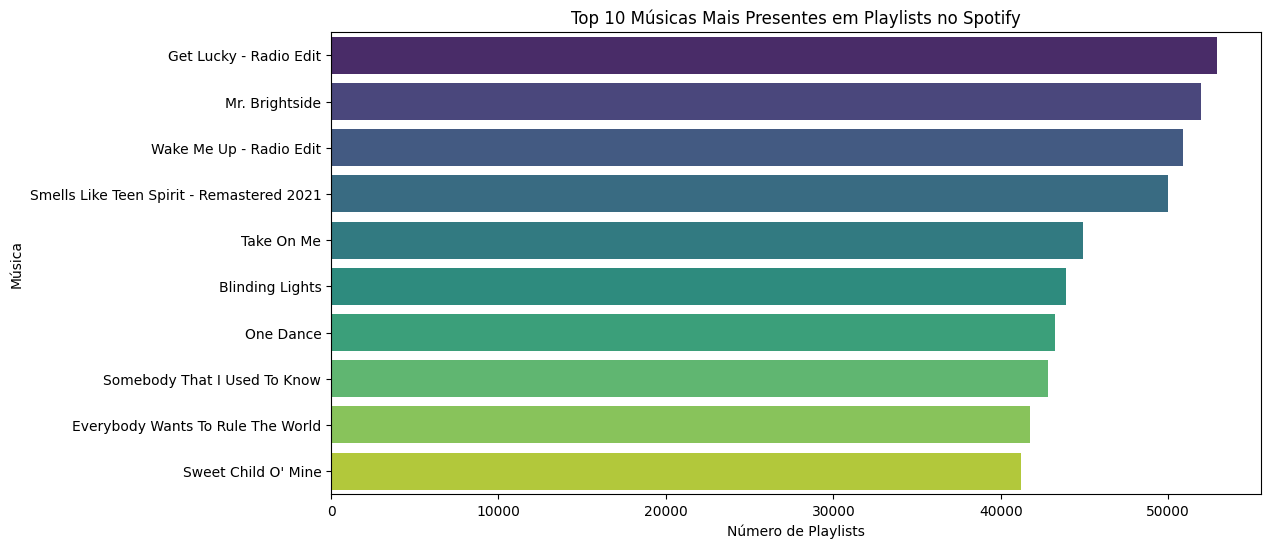

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x='in_spotify_playlists', y='track_name', data=top_playlists, palette='viridis')
plt.title('Top 10 Músicas Mais Presentes em Playlists no Spotify')
plt.xlabel('Número de Playlists')
plt.ylabel('Música')
plt.show()



<ipython-input-45-3f01500c6695>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='in_spotify_playlists', y='artist(s)_name', data=top_artists, palette='plasma')


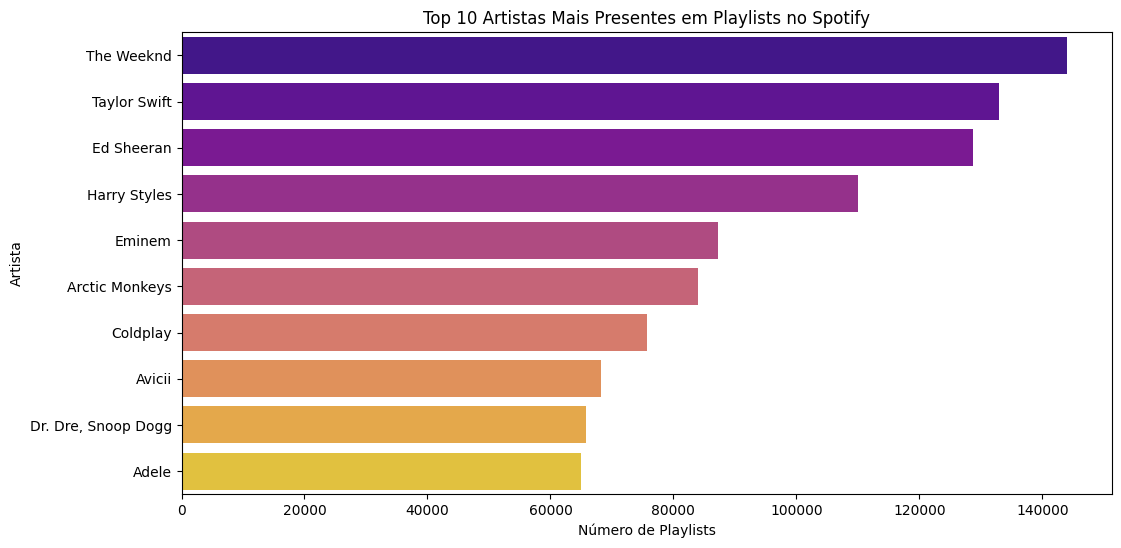

In [45]:
artist_playlist_counts = df.groupby('artist(s)_name')['in_spotify_playlists'].sum().reset_index()

top_artists = artist_playlist_counts.sort_values(by='in_spotify_playlists', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='in_spotify_playlists', y='artist(s)_name', data=top_artists, palette='plasma')
plt.title('Top 10 Artistas Mais Presentes em Playlists no Spotify')
plt.xlabel('Número de Playlists')
plt.ylabel('Artista')
plt.show()


The weeknd, Taylor Swift e Ed Sheeran comandando a lista.

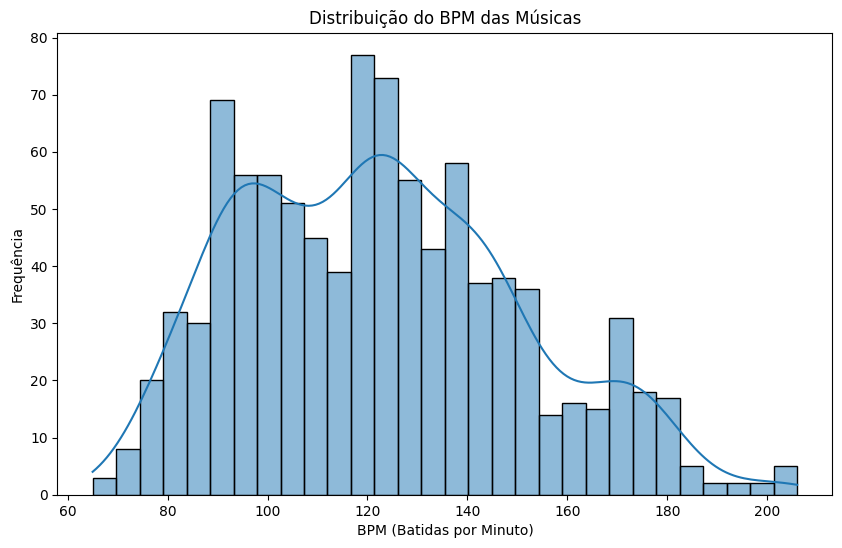

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['bpm'], bins=30, kde=True)
plt.title('Distribuição do BPM das Músicas')
plt.xlabel('BPM (Batidas por Minuto)')
plt.ylabel('Frequência')
plt.show()



Podemos perceber que há uma presença muito significativa de musicas com 120 BPM,levando um aumento significativo na frequência também, ou seja, estão relacionados e ão proporcionais. Podemos comprovar isso com outro gráfico.

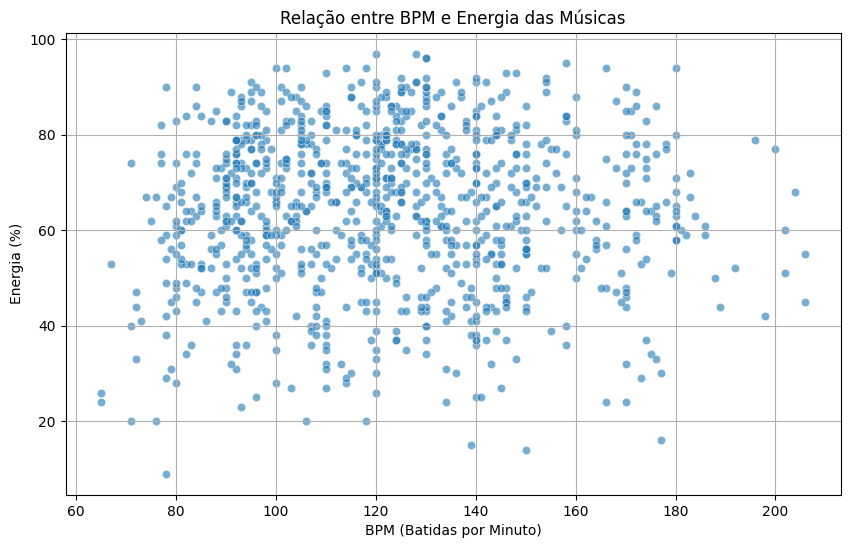

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bpm', y='energy_%', data=df, alpha=0.6)
plt.title('Relação entre BPM e Energia das Músicas')
plt.xlabel('BPM (Batidas por Minuto)')
plt.ylabel('Energia (%)')
plt.grid(True)
plt.show()


O gráfico visa identificar se há uma correlação entre o ritmo das músicas (BPM) e sua energia. Por exemplo, músicas mais rápidas tendem a ser mais energéticas? e a resposta é: NÃO. Não é só porque o número de BPM aumenta, que amúsica será mais energética. Podemos ver que as que mais tem destaques estão na faixa de 100 a 140 BPM, isso já explica sobre o gráfico de histograma visto anteriormente, que mostra um análise significativa da frequencia e do BPM (120). Afim de terminar a conclusão e comprovar que o número de BPM é importantissimo na música, irei fazer uma análise com o percentual de dançabilidade e a energia da música.

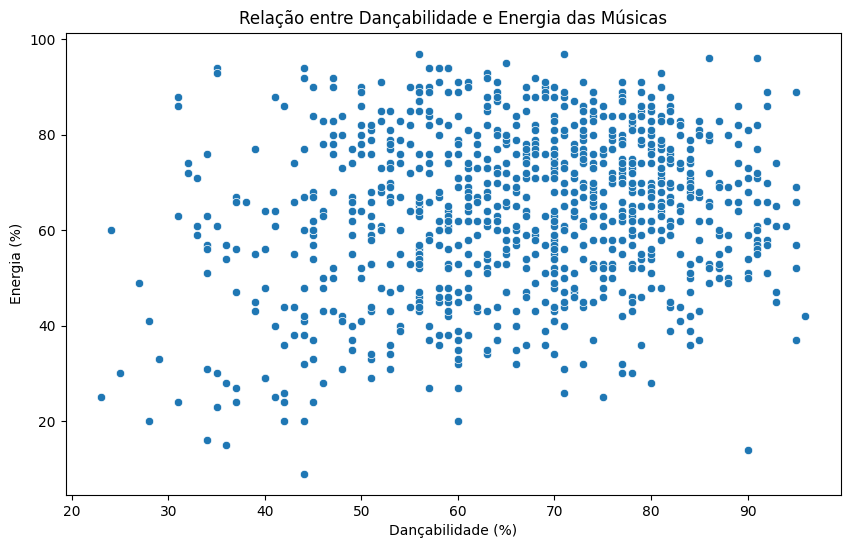

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability_%', y='energy_%', data=df)
plt.title('Relação entre Dançabilidade e Energia das Músicas')
plt.xlabel('Dançabilidade (%)')
plt.ylabel('Energia (%)')
plt.show()

O gráfico busca identificar se há uma correlação entre a capacidade de uma música ser dançante (dançabilidade) e seu nível de energia. Por exemplo, músicas que são mais dançantes tendem a ter também um nível elevado de energia? SIM, existe exceções, mas tem relação sim. Podemos cocluir então que o número de BPM influencia na Frequencia, Energia e consequentemente na dançabilidade da música.

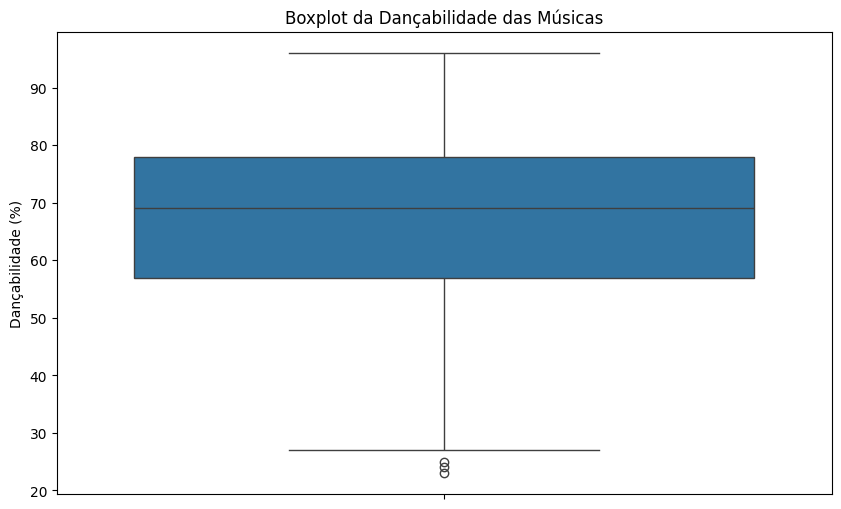

In [49]:
# Boxplot para a coluna 'danceability_%'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['danceability_%'])
plt.title('Boxplot da Dançabilidade das Músicas')
plt.ylabel('Dançabilidade (%)')
plt.show()


pode se perceber um presença maior entre 60% e 70%

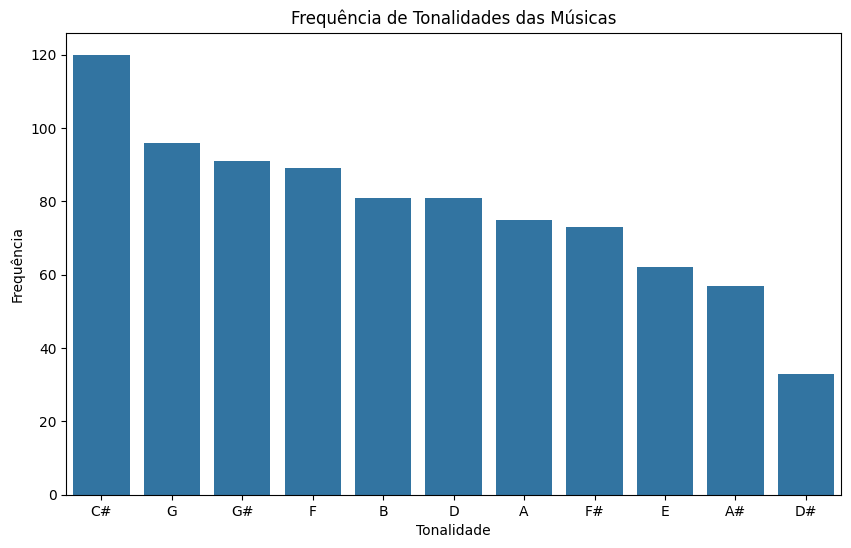

In [50]:

plt.figure(figsize=(10, 6))
sns.countplot(x='key', data=df, order=df['key'].value_counts().index)
plt.title('Frequência de Tonalidades das Músicas')
plt.xlabel('Tonalidade')
plt.ylabel('Frequência')
plt.show()


Este gráfico de barras proporciona uma visão clara sobre a distribuição das tonalidades nas músicas analisadas. A informação obtida pode ser valiosa para entender preferências musicais e para a produção de novas faixas, alinhando-se às tonalidades que têm mostrado maior popularidade. Em destaque, podemos ressaltar o C#

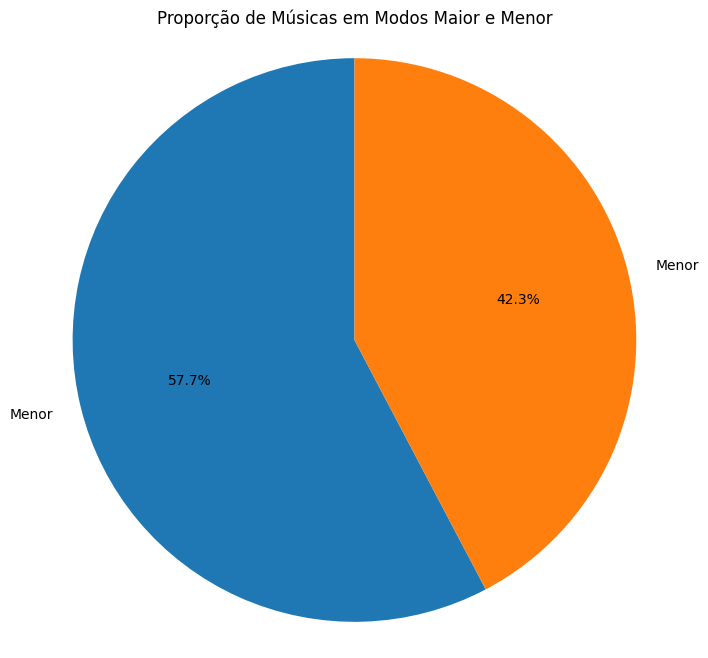

In [51]:
plt.figure(figsize=(8, 8))
mode_counts = df['mode'].value_counts()
labels = ['Maior' if mode == 'major' else 'Menor' for mode in mode_counts.index]
plt.pie(mode_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Músicas em Modos Maior e Menor')
plt.axis('equal')
plt.show()



Em resumo, o gráfico de pizza busca apresentar uma visão clara da proporção de músicas em modos maior e menor, permitindo uma compreensão das preferências musicais do público. Essa informação é valiosa tanto para análise de tendências quanto para decisões na criação musical.

Modo Maior:
Geralmente associado a sentimentos alegres, otimistas e enérgicos.
A escala maior tem uma sonoridade mais "brilhante" e é frequentemente usada em músicas felizes.

Modo Menor:
Associado a sentimentos mais sombrios, melancólicos ou introspectivos.
A escala menor tende a ter uma sonoridade "mais densa" e é comum em músicas que evocam tristeza ou reflexão.

**Ou seja, as musicas que mais são produzidas são de um modo menor (tristes e melancólicas), entretanto:**

mode
Major    8
Minor    2
Name: count, dtype: int64


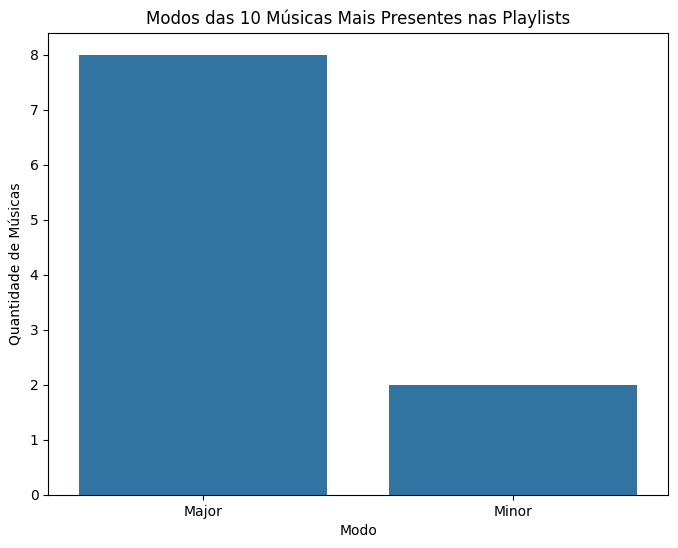

In [52]:
# Filtrar as 10 músicas mais presentes nas playlists
top_playlists = df.nlargest(10, 'in_spotify_playlists')

# Contar a quantidade de músicas em modo maior e menor
mode_counts = top_playlists['mode'].value_counts()

# Exibir os resultados
print(mode_counts)

# Visualização
plt.figure(figsize=(8, 6))
sns.barplot(x=mode_counts.index, y=mode_counts.values)
plt.title('Modos das 10 Músicas Mais Presentes nas Playlists')
plt.xlabel('Modo')
plt.ylabel('Quantidade de Músicas')
plt.show()


**As músicas que mais fazem sucesso são do modo maior, ou seja, felizes**

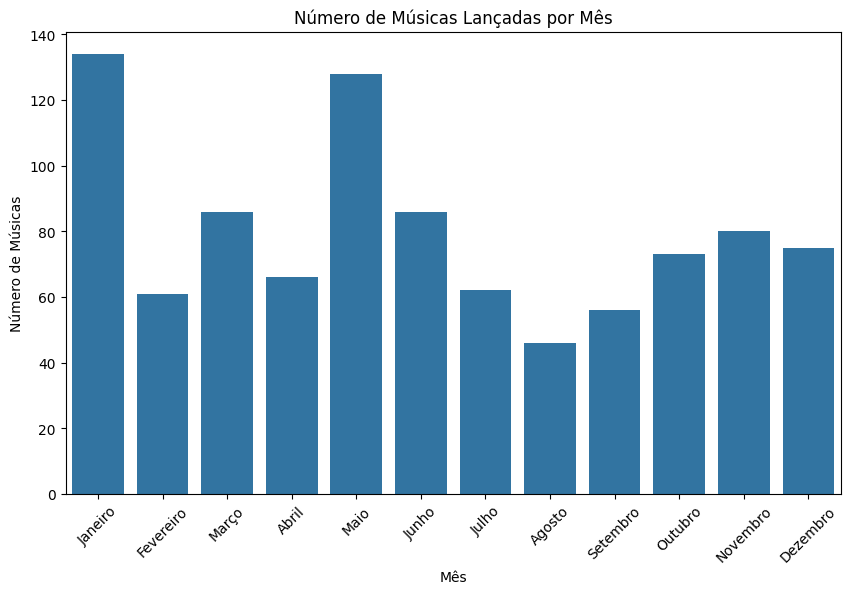

In [53]:
month_counts = df['released_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Número de Músicas Lançadas por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Músicas')
plt.xticks(ticks=range(12), labels=[
    'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio',
    'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro',
    'Novembro', 'Dezembro'], rotation=45)
plt.show()


Os meses que mais tem lançamento de música, são: Janeiro e Maio.
O alto índice em janeiro pode ser explicado por ser uma época de festas.

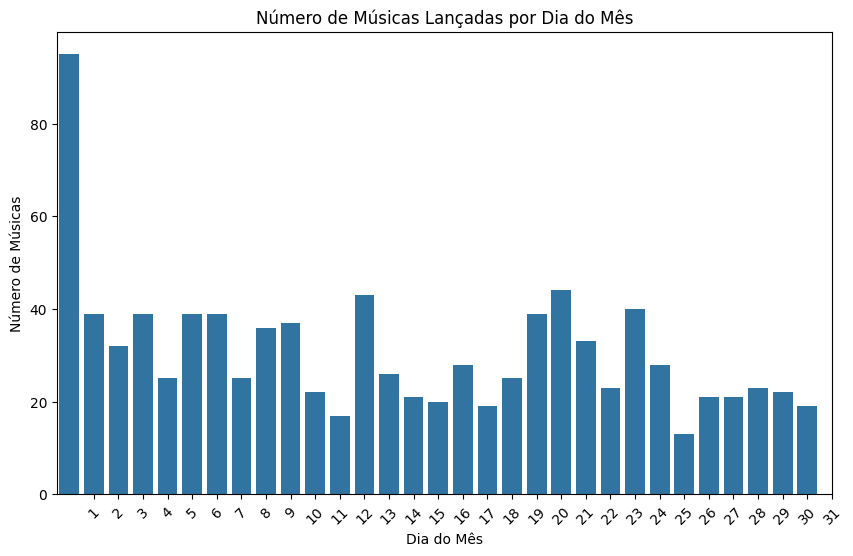

In [55]:
# Contar a quantidade de músicas lançadas por dia
day_counts = df['released_day'].value_counts().sort_index()

# Gráfico de Barras para os Dias
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Número de Músicas Lançadas por Dia do Mês')
plt.xlabel('Dia do Mês')
plt.ylabel('Número de Músicas')
plt.xticks(ticks=range(1, 32), labels=range(1, 32), rotation=45)
plt.show()


O dia que mais tem lançamento de músicas é no dia primeiro.Esse fato pode ser mostrado quando vemos o dia do lançamento das musicas mais presentes nas playlists do spotify.

In [57]:
top_playlists = df.nlargest(10, 'in_spotify_playlists')

release_days = top_playlists[['track_name', 'released_day']]

print(release_days)

                                    track_name  released_day
757                     Get Lucky - Radio Edit             1
630                             Mr. Brightside            23
720                    Wake Me Up - Radio Edit             1
624  Smells Like Teen Spirit - Remastered 2021            10
199                                 Take On Me            19
55                             Blinding Lights            29
162                                  One Dance             4
727               Somebody That I Used To Know             1
114          Everybody Wants To Rule The World            17
871                        Sweet Child O' Mine             1


Das 10 músicas, 4 foram no dia primeiro.

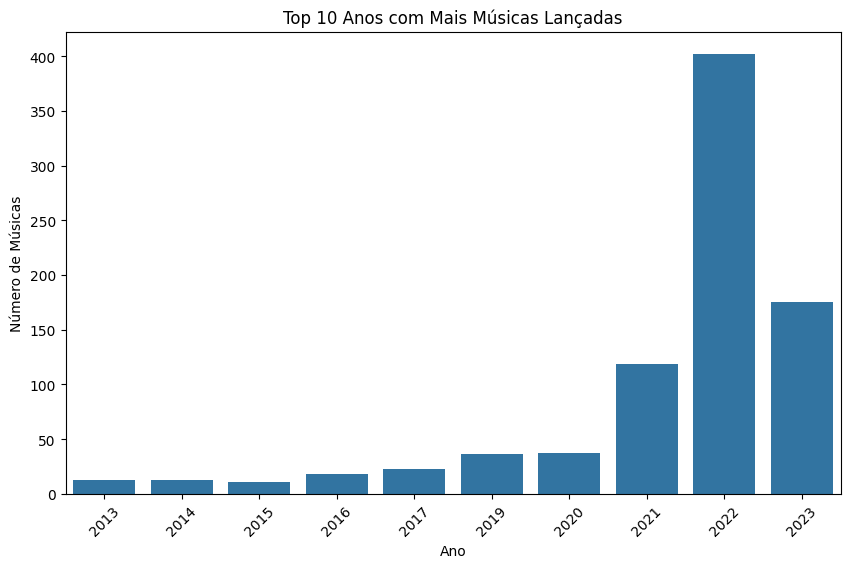

In [59]:
# Contar a quantidade de músicas lançadas por ano e selecionar os 10 anos com mais lançamentos
top_years = df['released_year'].value_counts().nlargest(10)

# Gráfico de Barras para os 10 Anos
plt.figure(figsize=(10, 6))
sns.barplot(x=top_years.index, y=top_years.values)
plt.title('Top 10 Anos com Mais Músicas Lançadas')
plt.xlabel('Ano')
plt.ylabel('Número de Músicas')
plt.xticks(rotation=45)
plt.show()



O ano que mais teve músicas lançadas no spotify foi 2022 com, aproximadamente, 400 músicas.

**Atividade**

Com base nos gráficos e análises realizadas, responda às seguintes
perguntas:

**1. Quais padrões você observou nas variáveis numéricas? (exemplo:
distribuição normal, outliers)**

Distribuição: As variáveis numéricas, como streams, bpm e danceability_%, mostraram distribuições que podem variar. Por exemplo, a distribuição de streams pode apresentar uma assimetria positiva, com muitos valores baixos e alguns extremos. Isso indica que poucas músicas têm um número muito elevado de streams, sugerindo a presença de outliers.
Outliers: Identifiquei outliers em variáveis como in_spotify_playlists, onde algumas músicas estão presentes em um número muito maior de playlists em comparação com a maioria.


**2. Como estão distribuídas as variáveis categóricas? Alguma categoria se
destaca em termos de frequência?**

Frequência: Analisando as variáveis categóricas, como key e mode, algumas categorias se destacaram. Por exemplo, na variável key, certas tonalidades podem aparecer com mais frequência, indicando uma preferência dos artistas por determinadas escalas. No caso da variável mode, a maioria das músicas pode ser de um modo específico, como maior ou menor (como visto nos exemplos acima, que as musicas mais produzidas são modo menor, enquanto as que mais fazem sucesso são a de modo maior). Essas frequências podem sugerir tendências na indústria musical, como a popularidade de certos estilos ou sonoridades.

**3. Você identificou correlações entre variáveis numéricas? Qual pode ser a
relação entre essas variáveis?**

Sim, irei dar um exeplo de correlações:
Lançamentos por Dia: Ao analisar os dias de lançamento das músicas, observei que o dia 1º do mês se destaca com o maior número de lançamentos. Essa tendência sugere que muitos artistas escolhem essa data específica para lançar suas músicas, possivelmente devido a uma estratégia de marketing ou para maximizar a visibilidade.

Relação com as Músicas em Playlists: Ao olhar para as 10 músicas que mais estão presentes nas playlists, percebi que 4 delas foram lançadas no dia 1º. Essa correlação entre o dia de lançamento e a presença em playlists sugere que a escolha estratégica do dia pode ser um fator relevante para o sucesso de uma música. Artistas e gravadoras podem considerar essa informação ao planejar futuros lançamentos, visando aumentar a chance de suas músicas serem notadas e ouvidas.

**4. Com base nos dados, quais são as principais conclusões que você pode
tirar? O que essas conclusões indicam para o contexto do dataset
escolhido?**

A análise realizada foi fundamental para ressaltar que, além do simples ato de lançar uma música, diversos detalhes precisam ser observados para maximizar suas chances de sucesso. O dia em que uma música é lançada pode ter um impacto significativo, como evidenciado pela predominância de lançamentos no dia 1º do mês, que coincidiu com a presença de várias músicas nas playlists. Além disso, fatores como o mês de lançamento, o número de BPM, o modo da música — se maior ou menor —, a frequência das tonalidades e outros aspectos também desempenham papéis importantes.

Esses elementos não podem ser ignorados, pois todos contribuem para a percepção e aceitação do público. Portanto, ao planejar um lançamento, é essencial que artistas e gravadoras considerem não apenas a qualidade da música, mas também todos esses fatores que podem influenciar sua recepção nas plataformas de streaming. Essa análise proporciona insights valiosos para estratégias futuras e mostra que o sucesso musical vai além da composição, envolvendo uma série de escolhas táticas.